In [1]:
import numpy as np
import matplotlib.pyplot as plt

from kedro.extras.datasets.pickle import PickleDataSet

In [ ]:
import os, sys
sys.path.append(os.path.abspath('../src'))

from tagseg.pipelines.data_processing.nodes import prepare_input
from tagseg.data.acdc_dataset import AcdcDataSet

In [3]:
dataset = PickleDataSet(filepath='../data/03_primary/acdc_train.pt').load()

In [4]:
transformation_params = dict(
    perform=True,
    generator_model=None,
    batch_size=None,
    physics=True,
)

tagged = prepare_input(dataset, transformation_params)

100%|██████████| 1828/1828 [01:56<00:00, 15.70it/s]


In [5]:
examples, labels = dataset.tensors

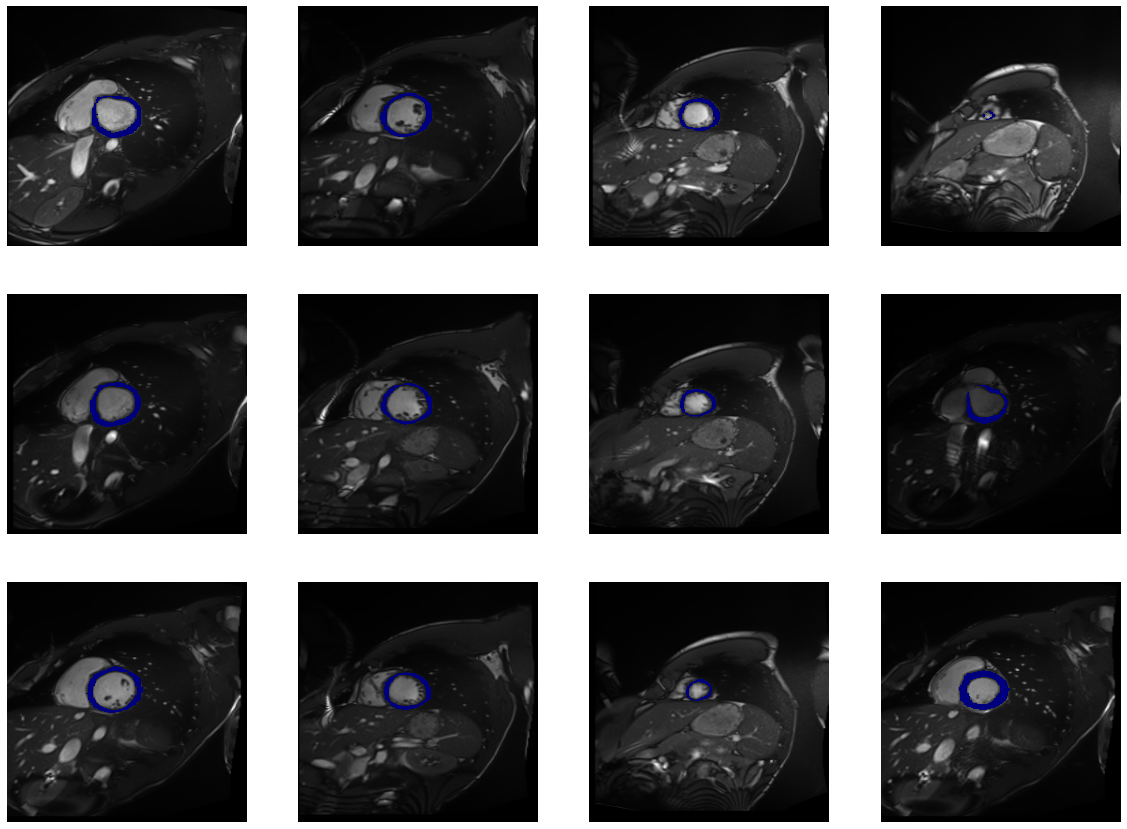

In [6]:
m, n = 3, 4

fig, ax = plt.subplots(m, n, figsize=(20, 15))

for a in range(m * n):
    i, j = a % m, a // m

    ax[i, j].imshow(examples[a, 0], cmap='gray')
    ax[i, j].imshow(np.ma.masked_where(labels[a] == 0, labels[a]), cmap='jet', alpha=1)
    ax[i, j].axis('off')

In [7]:
examples, labels = tagged.tensors

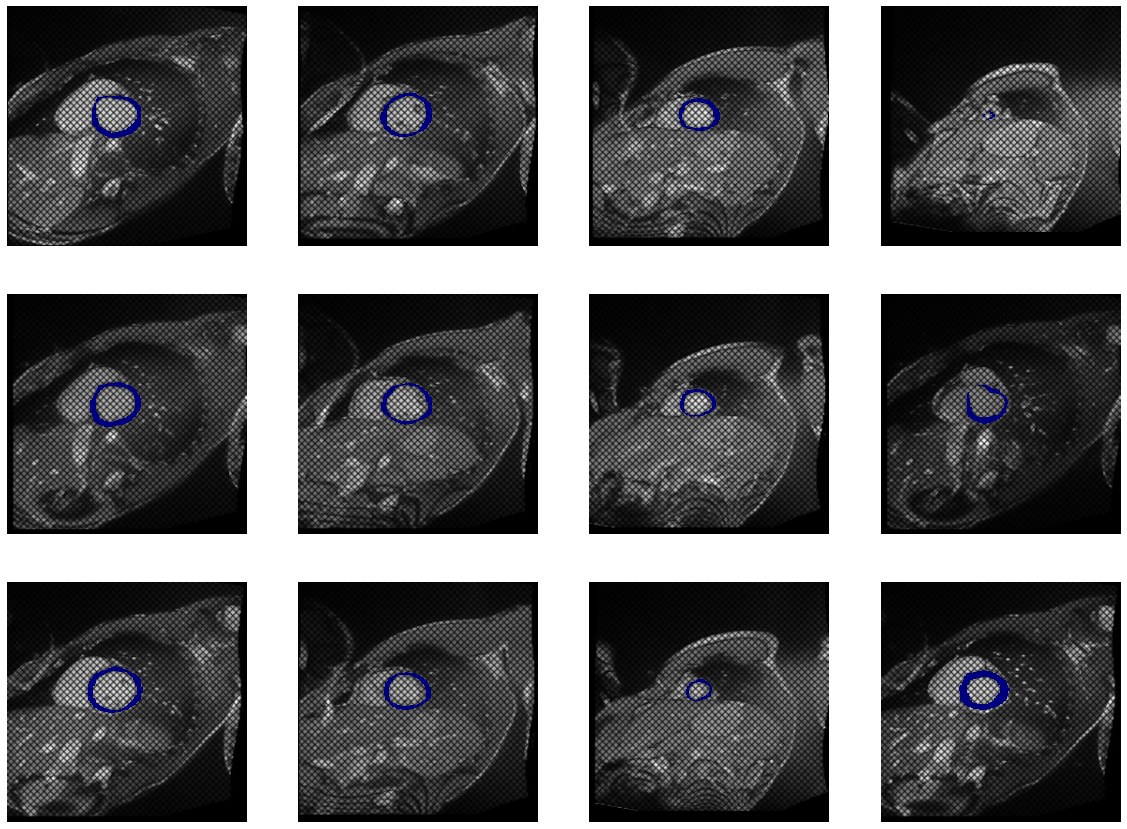

In [9]:
m, n = 3, 4

fig, ax = plt.subplots(m, n, figsize=(20, 15))

for a in range(m * n):
    i, j = a % m, a // m

    ax[i, j].imshow(examples[a, 0], cmap='gray')
    ax[i, j].imshow(np.ma.masked_where(labels[a, 0] == 0, labels[a, 0]), cmap='jet', alpha=1)
    ax[i, j].axis('off')